# Evaluation of RoBERTa Masked Language Modeling

In [12]:
import pandas as pd
import json
import copy

In [13]:
with open("data/flickr_test_masked.json") as f:
    results = json.load(f)

def build_row(img_inst):
    new_inst = copy.deepcopy(img_inst)
    new_inst["tokens_positive_eval"] = None
    new_inst["orig_tokens_positive_eval"] = None
    new_inst["tokens_negative"] = None
    return new_inst

new_imgs = [build_row(x) for x in results["images"]]

In [14]:
results_df = pd.DataFrame.from_dict(new_imgs)
results_df

,file_name,height,width,id,caption,dataset_name,tokens_negative,sentence_id,original_img_id,tokens_positive_eval,...,orig_id,orig_sentence_id,orig_tokens_positive_eval,pred_word,masked_caption,masked_word,score_raw,score_scaled,score_k,tokens_positive_eval_idx
0,1016887272.jpg,500,333,0,Several climbers in a row are climbing the roc...,flickr,None,0,1016887272,None,...,153901,0,None,ropes,Several climbers in a row are climbing the roc...,line,0.060851,0.122919,3,4
1,1016887272.jpg,500,333,1,Several climbers in a row are climbing the roc...,flickr,None,1,1016887272,None,...,153901,0,None,reins,Several climbers in a row are climbing the roc...,line,0.009116,0.018414,7,4
2,7162685234.jpg,333,500,2,Two children playing on the swings in the sand...,flickr,None,0,7162685234,None,...,153906,0,None,swings,Two children playing on the <mask> in the sand...,beach,0.078458,0.256047,2,1
3,7162685234.jpg,333,500,3,Two children playing on the bikes in the sand ...,flickr,None,1,7162685234,None,...,153906,0,None,bikes,Two children playing on the <mask> in the sand...,beach,0.038087,0.124297,3,1
4,7162685234.jpg,333,500,4,Two children playing on the rocks in the sand ...,flickr,None,2,7162685234,None,...,153906,0,None,rocks,Two children playing on the <mask> in the sand...,beach,0.014063,0.045894,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7888,1015118661.jpg,375,500,7888,A little boy is standing on the sidelines whil...,flickr,None,1,1015118661,None,...,158866,1,None,sidelines,A little boy is standing on the <mask> while a...,street,0.015828,0.054147,8,1
7889,1015118661.jpg,375,500,7889,A little boy is standing on the street while a...,flickr,None,2,1015118661,None,...,158866,1,None,Brooklyn,A little boy is standing on the street while a...,overalls,0.035121,0.502833,1,3
7890,1015118661.jpg,375,500,7890,A little boy is standing on the street while a...,flickr,None,3,1015118661,None,...,158866,1,None,France,A little boy is standing on the street while a...,overalls,0.018215,0.260784,8,3
7891,1015118661.jpg,375,500,7891,A little boy is standing on the street while a...,flickr,None,4,1015118661,None,...,158866,1,None,Bangladesh,A little boy is standing on the street while a...,overalls,0.015795,0.226137,9,3


In [40]:
import numpy as np

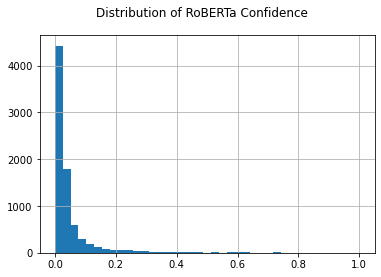

In [45]:
# score_raw	score_scaled	score_k
import pylab as pl
axes = results_df["score_raw"].hist(bins=np.linspace(0, 1, 40))
_ = pl.suptitle("Distribution of RoBERTa Confidence")

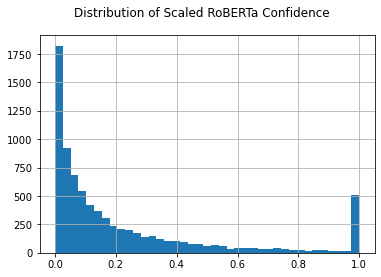

In [46]:
# score_raw	score_scaled	score_k
import pylab as pl
axes = results_df["score_scaled"].hist(bins=np.linspace(0, 1, 40))
_ = pl.suptitle("Distribution of Scaled RoBERTa Confidence")

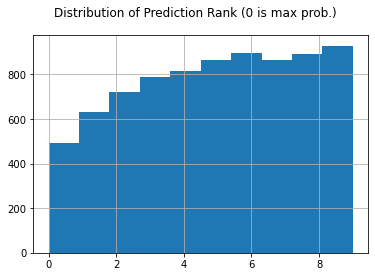

In [48]:
import pylab as pl
axes = results_df["score_k"].hist()
_ = pl.suptitle("Distribution of Prediction Rank (0 is max prob.)")

In [31]:
import glob
from pathlib import Path

dfs = []

for f in glob.glob("output/*eval_time.csv"):
    fname = Path(f).name
    print(fname)
    split = fname.split("_")

    gpu_type = split[0]
    model_type = split[2]
    bs = split[3]

    df = pd.read_csv(f)

    df["gpu_type"] = gpu_type
    df["model_type"] = model_type
    df["bs"] = int(bs)
    
    dfs.append(df)

combined = pd.concat(dfs).drop("Unnamed: 0", axis=1)
combined

rtx8000_mdetr_efficientnetB3_10_eval_time.csv
v100_mdetr_resnet101_25_eval_time.csv
rtx8000_mdetr_efficientnetB5_25_eval_time.csv
rtx8000_mdetr_efficientnetB5_5_eval_time.csv
v100_mdetr_efficientnetB5_5_eval_time.csv
v100_mdetr_efficientnetB5_1_eval_time.csv
rtx8000_mdetr_efficientnetB5_1_eval_time.csv
rtx8000_mdetr_resnet101_50_eval_time.csv
v100_mdetr_resnet101_1_eval_time.csv
v100_mdetr_efficientnetB5_10_eval_time.csv
v100_mdetr_resnet101_5_eval_time.csv
rtx8000_mdetr_resnet101_10_eval_time.csv
v100_mdetr_efficientnetB3_25_eval_time.csv
rtx8000_mdetr_efficientnetB3_1_eval_time.csv
v100_mdetr_efficientnetB3_1_eval_time.csv
v100_mdetr_efficientnetB3_5_eval_time.csv
rtx8000_mdetr_efficientnetB3_5_eval_time.csv
rtx8000_mdetr_resnet101_5_eval_time.csv
rtx8000_mdetr_resnet101_1_eval_time.csv
v100_mdetr_resnet101_10_eval_time.csv
rtx8000_mdetr_efficientnetB5_10_eval_time.csv
rtx8000_mdetr_efficientnetB3_25_eval_time.csv
v100_mdetr_efficientnetB3_10_eval_time.csv
rtx8000_mdetr_resnet101_25_

,total_cumulative_time,batch_time,model_scoring_time,post_processing_time,gpu_type,model_type,bs
0,7.652452,5.411121,3.733840,1.552557,rtx8000,efficientnetB3,10
1,9.725491,1.765453,0.281142,1.451199,rtx8000,efficientnetB3,10
2,11.503588,1.756125,0.280393,1.442852,rtx8000,efficientnetB3,10
3,13.331980,1.804251,0.306628,1.460782,rtx8000,efficientnetB3,10
4,15.153791,1.795350,0.306558,1.452703,rtx8000,efficientnetB3,10
...,...,...,...,...,...,...,...
313,1769.536860,5.236986,1.217451,3.896962,v100,efficientnetB5,25
314,1775.943139,5.286016,1.254733,3.908134,v100,efficientnetB5,25
315,1780.676564,3.623870,0.793819,2.755013,v100,efficientnetB5,25
0,25.623204,18.446871,5.274828,12.918848,v100,resnet101,50


In [38]:
runtimes = combined.groupby(["gpu_type", "model_type", "bs"])["total_cumulative_time"].max()
runtimes.to_csv("data/runtimes.csv")
runtimes

gpu_type  model_type      bs
rtx8000   efficientnetB3  1     5985.057900
                          5     2315.462034
                          10    1879.812081
                          25    1952.657409
          efficientnetB5  1     6097.589397
                          5     2333.660515
                          10    2024.211313
                          25    2155.363988
          resnet101       1     5984.471876
                          5     2398.830361
                          10    2002.745179
                          25    2126.245727
                          50    1906.240563
v100      efficientnetB3  1     8985.096552
                          5     2254.231734
                          10    2611.136887
                          25    2455.410847
          efficientnetB5  1     6328.430410
                          5     2349.030134
                          10    2093.149725
                          25    1780.676564
          resnet101       1     5880.704913
   